# Multi Layer Perceptron Model 3 : **NASA Asteroid Classification Dataset**:

In [25]:
# Dataset from Kaggle
#!kaggle datasets download -d shrutimehta/nasa-asteroids-classification

Dataset URL: https://www.kaggle.com/datasets/shrutimehta/nasa-asteroids-classification
License(s): CC0-1.0
nasa-asteroids-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [26]:
# unzip the downloaded dataset
#!unzip nasa-asteroids-classification.zip

Archive:  nasa-asteroids-classification.zip
  inflating: Raw_Data_JSON/Raw_Data/.~lock.names.csv#  
  inflating: Raw_Data_JSON/Raw_Data/file1.json  
  inflating: Raw_Data_JSON/Raw_Data/file1995-01-01.json  
  inflating: Raw_Data_JSON/Raw_Data/file1995-01-08.json  
  inflating: Raw_Data_JSON/Raw_Data/file1995-01-15.json  
  inflating: Raw_Data_JSON/Raw_Data/file1995-01-22.json  
  inflating: Raw_Data_JSON/Raw_Data/file1995-02-08.json  
  inflating: Raw_Data_JSON/Raw_Data/file1995-02-15.json  
  inflating: Raw_Data_JSON/Raw_Data/file1995-02-22.json  
  inflating: Raw_Data_JSON/Raw_Data/file1995-03-08.json  
  inflating: Raw_Data_JSON/Raw_Data/file1995-03-15.json  
  inflating: Raw_Data_JSON/Raw_Data/file1995-03-22.json  
  inflating: Raw_Data_JSON/Raw_Data/file1995-04-08.json  
  inflating: Raw_Data_JSON/Raw_Data/file1995-04-15.json  
  inflating: Raw_Data_JSON/Raw_Data/file1995-04-22.json  
  inflating: Raw_Data_JSON/Raw_Data/file1995-05-08.json  
  inflating: Raw_Data_JSON/Raw_Data/fil

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7601 - loss: 0.5088 - val_accuracy: 0.8507 - val_loss: 0.2944
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8704 - loss: 0.2734 - val_accuracy: 0.9067 - val_loss: 0.1940
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9362 - loss: 0.1773 - val_accuracy: 0.9427 - val_loss: 0.1414
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.1280 - val_accuracy: 0.9533 - val_loss: 0.1097
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9710 - loss: 0.0890 - val_accuracy: 0.9587 - val_loss: 0.0959
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9720 - loss: 0.0758 - val_accuracy: 0.9733 - val_loss: 0.0744
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9717 - loss: 0.0730 - val_accuracy: 0.9613 - val_loss: 0.0775
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9769 - loss: 0.0922 - val_accuracy: 0.9587 - val_loss: 0.0748
Epo

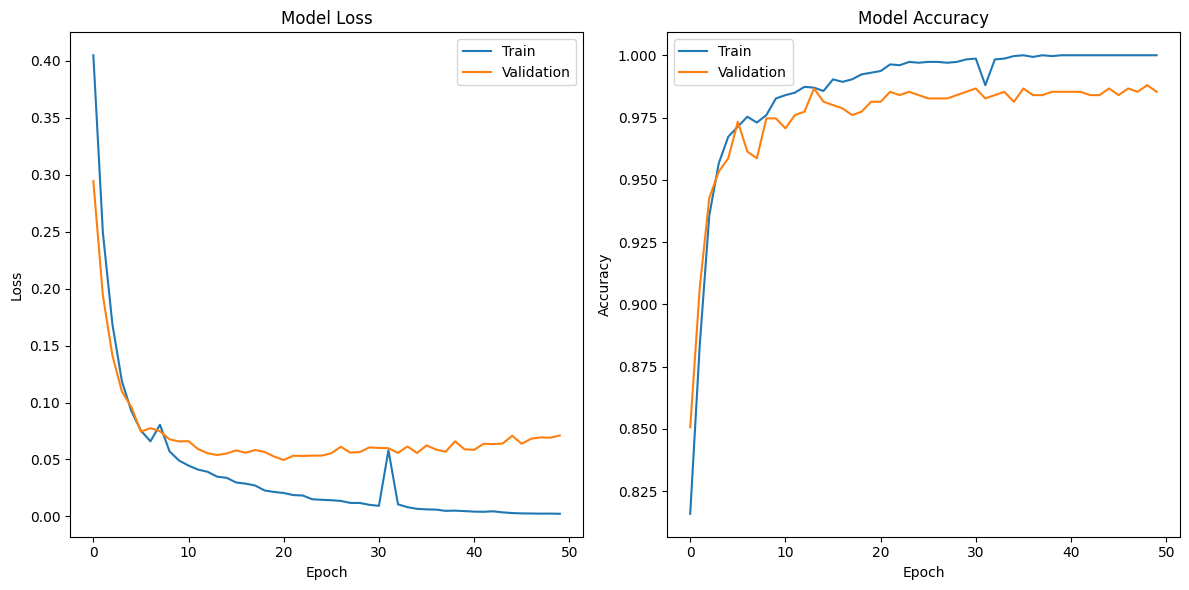

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('./nasa.csv')

# Step 2: Preprocess the data
# Drop columns that are not useful for modeling
columns_to_drop = [
    'Neo Reference ID', 'Name', 'Close Approach Date', 'Epoch Date Close Approach',
    'Orbit ID', 'Orbit Determination Date', 'Equinox'
]
data = data.drop(columns=columns_to_drop)

# Fill missing values if necessary (example: fill with mean or median)
data = data.fillna(data.median(numeric_only=True))

# Encode categorical variables
label_encoders = {}
for column in ['Orbiting Body', 'Hazardous']:  # Encode categorical features and target
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features and target
X = data.drop('Hazardous', axis=1)
y = data['Hazardous']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the target variable to categorical (one-hot encoding)
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

# Step 3: Build the MLP model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='sigmoid'))  # Output layer for binary classification

# Step 4: Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()
